##### <div style="text-align: center"> DA5401 Data Analytics Labarotary  </div>

##### <div style="text-align: center">Assignment 5 - Submitted by: DA24M011 - Nandhakishore C S</div>

#### Task 1 [40 Points]

<p style='text-align: justify;'> (From Question) <p>

<p style='text-align: justify;'> 
    Let’s consider the classification problem in <a href="url">https://archive.ics.uci.edu/dataset/76/nursery</a> which is a 8-features, 3-classes dataset.    It is mentioned in the link that the expected performance of over 90% accuracy (See Baseline Model Performance).    Let’s add the following model performance outcomes to the baselines, shall we?
</p>

1. Decision Tree (categorical features)
2. Decision Tree (categorical features in one-hot encoded form)
3. Logistic Regression with L1 regularization
4. K-Nearest Neighbors

<p style='text-align: justify;'> 
    You are expected to split the data into train, val & test.    Use the val partition to tune the hyperparameters such as (but not limited to) k of kNN, height of DT, or lambda of L1 reg. Remember, there are several other hyper parameters.
</p>

<p style='text-align: justify;'> 
    Report the performance of the test-data.    Create a similar visualization with 9 methods now, with your additional 4 methods.    The plot shows the mean and variance, FYI.    Use a suitable visualization method to get them.    You may wonder; to compute variance, you need more than 2 samples.   Right.    Repeat this task 5 times to get the mean and variance. 
</p>

<p style='text-align: left;'> Importing Libraries <p>

In [1]:
import pandas as pd  # type: ignore
import numpy as np  # type: ignore
import seaborn as sns  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

from sklearn.model_selection import train_test_split, GridSearchCV # type: ignore
from sklearn import tree # type: ignore
from sklearn.tree import DecisionTreeClassifier # type: ignore
from sklearn.metrics import  accuracy_score,  precision_score # type: ignore 

import warnings
warnings.filterwarnings("ignore")

<p style='text-align: left;'> Data Processing <p>

In [2]:
file_path = '/Users/nandhakishorecs/Documents/IITM/Jul_Nov_2024/DA5401_Data_Analytics_Lab/Assignment5/nursery/nursery.data'
df = pd.read_csv(file_path, names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'final evaluation'])

In [3]:
df.describe()

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
count,12960,12960,12960,12960,12960,12960,12960,12960,12960
unique,3,5,4,4,3,2,3,3,5
top,usual,proper,complete,1,convenient,convenient,nonprob,recommended,not_recom
freq,4320,2592,3240,3240,4320,6480,4320,4320,4320


In [4]:
df['final evaluation'].unique()

array(['recommend', 'priority', 'not_recom', 'very_recom', 'spec_prior'],
      dtype=object)

<p style='text-align: left;'> Collasping 5 label dataset to a 3 label dataset <p>

In [5]:
# OLD:  0 - recommend, 1 - priority, 2 - not_recom, 3 - very_recom, 4 - spec_prior 
# NEW: 0 - [spec_prior, recommend, very_recom], 1 - not_recom, 2 - priority 

new_classes = { 'recommend':'recommended', 'priority':'priority' , 'not_recom':'not_recom', 'very_recom':'recommended', 'spec_prior':'recommended' }
df['final evaluation'] = df['final evaluation'].map(new_classes)
df

,parents,has_nurs,form,children,housing,finance,social,health,final evaluation
0,usual,proper,complete,1,convenient,convenient,nonprob,recommended,recommended
1,usual,proper,complete,1,convenient,convenient,nonprob,priority,priority
2,usual,proper,complete,1,convenient,convenient,nonprob,not_recom,not_recom
3,usual,proper,complete,1,convenient,convenient,slightly_prob,recommended,recommended
4,usual,proper,complete,1,convenient,convenient,slightly_prob,priority,priority
...,...,...,...,...,...,...,...,...,...
12955,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,priority,recommended
12956,great_pret,very_crit,foster,more,critical,inconv,slightly_prob,not_recom,not_recom
12957,great_pret,very_crit,foster,more,critical,inconv,problematic,recommended,recommended
12958,great_pret,very_crit,foster,more,critical,inconv,problematic,priority,recommended


<p style='text-align: left;'> Checking for missing values and Nan <p>

In [6]:
print(df['final evaluation'].unique())
df.isnull().sum()

['recommended' 'priority' 'not_recom']


parents             0
has_nurs            0
form                0
children            0
housing             0
finance             0
social              0
health              0
final evaluation    0
dtype: int64

<p style='text-align: left;'> Performing Hyper-parameter tuning for the models: <p>

1. Decision Tree Classifier 
2. Decision Tree Classifier - Using OneHot Encoding 
3. Logistic Regression with L1 Regularisation 
4. K Nearest Neighbour Classifier 

In [7]:
from sklearn.preprocessing import LabelEncoder # type: ignore 

df_label_encoded = df.apply(LabelEncoder().fit_transform)
df_label_encoded.columns 

Index(['parents', 'has_nurs', 'form', 'children', 'housing', 'finance',
       'social', 'health', 'final evaluation'],
      dtype='object')

In [8]:
from sklearn.preprocessing import OneHotEncoder # type: ignore
encoder = OneHotEncoder(sparse_output=False)

encoded_table = encoder.fit_transform(df.drop('final evaluation', axis = 1))

df_onehot_encoded = pd.DataFrame(encoded_table, columns=encoder.get_feature_names_out())
df_onehot_encoded['final evaluation'] = df_label_encoded['final evaluation']

In [ ]:
# performing the experiment for 5 times to get the mean and variance of accuracy values 
from sklearn.model_selection import train_test_split # type: ignore 
from sklearn.linear_model import LogisticRegression # type: ignore 
from sklearn.neighbors import KNeighborsClassifier # type: ignore 

# creating separate dictionaries 

accuracy_results = {
    'Decision_Tree_LE': [], 
    'Decision_Tree_OHE': [], 
    'Logistic_Regression_L1_OHE': [], 
    'KNN_OHE': [] 
}
precision_results = {
    'Decision_Tree_LE': [], 
    'Decision_Tree_OHE': [], 
    'Logistic_Regression_L1_OHE': [], 
    'KNN_OHE': [] 
}

for i in range(5): 

    #-------------------------- Decision Tree - Label Encoding --------------------------

    label_train_x, label_test_x, label_train_y, label_test_y = train_test_split(
        df_label_encoded.drop('final evaluation', axis = 1), 
        df_label_encoded['final evaluation'], 
        test_size = 0.2
    )

    param_grid = { 
        'max_depth' : [1, 2, 3, 4, None],
        'min_samples_split' : [2, 5, 10], 
        'min_samples_leaf' : [1, 2, 4, 8, 16], 
    }
    tree_clf = DecisionTreeClassifier()
    grid_search = GridSearchCV(
        estimator = tree_clf, 
        param_grid = param_grid, 
        cv = 5, 
        n_jobs = -1,  
        verbose = 2,
        scoring = 'neg_mean_squared_error'
    )
    grid_search.fit(label_train_x, label_train_y)
    
    best_tree_clf = grid_search.best_estimator_
    pred_y = best_tree_clf.predict(label_test_x)
    dt_test_acc = accuracy_score(label_test_y, pred_y)
    dt_test_precision = precision_score(label_test_y, pred_y, average = 'micro')
    accuracy_results['Decision_Tree_LE'].append(dt_test_acc)
    precision_results['Decision_Tree_LE'].append(dt_test_precision)

    #-------------------------- Decision Tree - One Hot Encoding --------------------------

    one_hot_train_x, one_hot_test_x, one_hot_train_y, one_hot_test_y = train_test_split(
        df_onehot_encoded.drop('final evaluation', axis = 1), 
        df_label_encoded['final evaluation'], 
        test_size = 0.2
    )

    param_grid = { 
        'max_depth' : [1, 2, 3, 4, None],
        'min_samples_split' : [2, 5, 10], 
        'min_samples_leaf' : [1, 2, 4, 8, 16]
    }
    tree_clf = DecisionTreeClassifier()
    grid_search = GridSearchCV(
        estimator = tree_clf, 
        param_grid = param_grid, 
        cv = 5, 
        n_jobs = -1,  
        verbose = 2,
        scoring = 'neg_mean_squared_error'
    )
    grid_search.fit(one_hot_train_x, one_hot_train_y)

    best_tree_clf = grid_search.best_estimator_
    pred_y = best_tree_clf.predict(one_hot_test_x)
    dt_ohe_test_acc = accuracy_score(one_hot_test_y, pred_y)
    df_ohe_test_precision = precision_score(one_hot_test_y, pred_y, average = 'micro')

    accuracy_results['Decision_Tree_OHE'].append(dt_ohe_test_acc)
    precision_results['Decision_Tree_OHE'].append(df_ohe_test_precision)


    #-------------------------- Lasso Logistic Regression  - One Hot Encoding --------------------------

    parameter_grid = [{
        'C': [10000, 1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
        # 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        # 'solver': ['lbfgs','newton-cg','liblinear','sag','saga'], 
        'max_iter': [1, 2, 4, 8, 16, 32]
    }]

    clf = LogisticRegression(penalty='l1', solver='liblinear')
    grid_search = GridSearchCV(
        estimator = clf, 
        param_grid = parameter_grid, 
        cv = 5, 
        n_jobs = -1,  
        verbose = True,
        scoring = 'neg_mean_squared_error'
    )
    grid_search.fit(one_hot_train_x, one_hot_train_y)

    clf = grid_search.best_estimator_
    pred_y = clf.predict(one_hot_test_x)
    lr_test_acc = accuracy_score(one_hot_test_y, pred_y)
    lr_test_precision = precision_score(one_hot_test_y, pred_y, average = 'micro')

    accuracy_results['Logistic_Regression_L1_OHE'].append(lr_test_acc)
    precision_results['Logistic_Regression_L1_OHE'].append(lr_test_precision)

    #-------------------------- K Neareste Neighbor Classifier  - One Hot Encoding --------------------------

    parameter_grid = {
        'n_neighbors': [ 3, 5, 7, 9], 
        'metric': ['euclidean', 'manhattan', 'minkowski'],
        'weights': ['uniform', 'distance'],
        'algorithm' : ['auto', 'kd_tree', 'brute', 'ball_tree']
    }

    knn = KNeighborsClassifier()   
    grid_search = GridSearchCV(
        estimator = knn, 
        param_grid = parameter_grid, 
        cv = 5,
        n_jobs = -1,  
        verbose = True,
    )
    grid_search.fit(one_hot_train_x, one_hot_train_y)

    clf = grid_search.best_estimator_
    pred_y = clf.predict(one_hot_test_x)
    knn_test_acc = accuracy_score(one_hot_test_y, pred_y)
    knn_test_precision = precision_score(one_hot_test_y, pred_y,average = 'micro')
    
    accuracy_results['KNN_OHE'].append(lr_test_precision)
    precision_results['KNN_OHE'].append(lr_test_precision)

<p style='text-align: left;'> Helper function to get mean and variance to get confidence interval to plot the error plots <p>

In [10]:
import scipy # type: ignore
from scipy.stats import t, sem # type: ignore
\
# Referece: https://sphweb.bumc.bu.edu/otlt/MPH-Modules/PH717-QuantCore/PH717-Module6-RandomError/PH717-Module6-RandomError11.html

def mean_confidence_interval(data, confidence_interval = 0.95 ): 
    mean = np.mean(data)
    sem = scipy.stats.sem(data)
    interval = scipy.stats.t.interval(confidence_interval, len(data)-1, loc = mean, scale =sem)
    return mean , interval

In [11]:
models = list(accuracy_results.keys())
type(models)
print(models)

['Decision_Tree_LE', 'Decision_Tree_OHE', 'Logistic_Regression_L1_OHE', 'KNN_OHE']


<p style='text-align: left;'> Plotting the Accuracy values for our models <p>

['Decision_Tree_LE', 'Decision_Tree_OHE', 'Logistic_Regression_L1_OHE', 'KNN_OHE', 'Xgboost Classification', 'SVM', 'Random Forest Classification', 'Neural Network Classification', 'Logistic Regression']
[0.32489872546237564, 0.16455462587948944, 0.5911790611771295, 0.5911790611771295, 0.06199999999999761, 0.3089999999999975, 0.4939999999999998, 0.0, 0.9260000000000019]


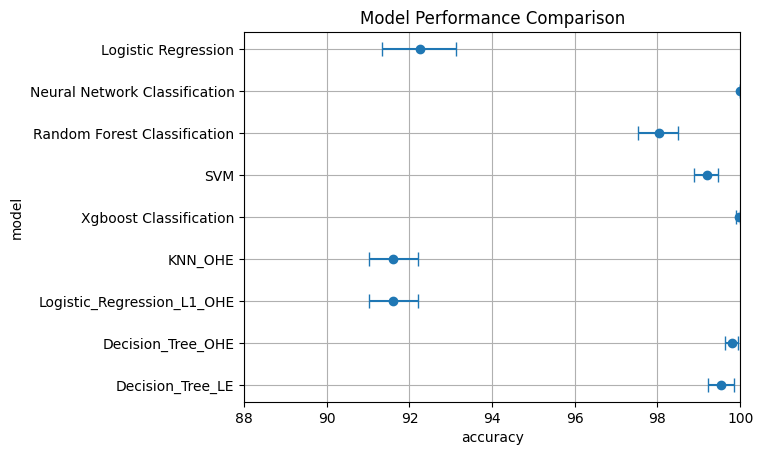

In [12]:
acc_mean_values = []
acc_upper_bounds = []
acc_lower_bounds = []

for model in models: 
    mean, ci = mean_confidence_interval(accuracy_results[model])
    mean = np.array(mean) * 100 
    ci = np.array(ci) * 100 

    lower_bound = mean - ci[0]
    upper_bound = - mean + ci[1]

    acc_mean_values.append(mean)
    acc_upper_bounds.append(upper_bound)
    acc_lower_bounds.append(lower_bound)


## Getiing the accuracy values of other models from the webpage for plotting error plot 

# Getting Model Names 
models.append('Xgboost Classification')
models.append('SVM')
models.append('Random Forest Classification')
models.append('Neural Network Classification')
models.append('Logistic Regression')

print(models)

# Adding mean values from the webpage 
acc_mean_values.append(99.969)
acc_mean_values.append(99.198)
acc_mean_values.append(98.025)
acc_mean_values.append(100.000)
acc_mean_values.append(92.253)

# Adding boundary values from the webpage 

acc_lower_bounds.append(acc_mean_values[4] - 99.907)
acc_lower_bounds.append(acc_mean_values[5] - 98.889)
acc_lower_bounds.append(acc_mean_values[6] - 97.531)
acc_lower_bounds.append(acc_mean_values[7] - 100.000)
acc_lower_bounds.append(acc_mean_values[8] - 91.327)


acc_upper_bounds.append(100.000 - acc_mean_values[4])
acc_upper_bounds.append(99.475 - acc_mean_values[5])
acc_upper_bounds.append(98.488 - acc_mean_values[6])
acc_upper_bounds.append(100.000 - acc_mean_values[7])
acc_upper_bounds.append(93.117 - acc_mean_values[8])

print(acc_lower_bounds)


plt.errorbar(acc_mean_values, models, xerr=[acc_lower_bounds, acc_upper_bounds], fmt='o', capsize=5)
plt.xlim(88, 100)
plt.xlabel('accuracy')
plt.ylabel('model')
plt.title('Model Performance Comparison')
plt.grid() 

In [13]:
# Tried Precision value plotting in the hope of replicating the results from webpage 
'''
    pre_mean_values = []
    pre_upper_bounds = []
    pre_lower_bounds = []

    for model in model_names: 
        mean, ci = mean_confidence_interval(precision_results[model])
        mean = np.array(mean) * 100 
        ci = np.array(ci) * 100 

        lower_bound = mean - ci[0]
        upper_bound = - mean + ci[1]

        pre_mean_values.append(mean)
        pre_upper_bounds.append(upper_bound)
        pre_lower_bounds.append(lower_bound)

    plt.errorbar(pre_mean_values, model_names, xerr=[acc_lower_bounds, acc_upper_bounds], fmt='o', capsize=5)
    plt.xlabel('precision')
    plt.ylabel('model')
    plt.title('Model Performance Comparison')

    plt.grid() 
'''

"\n    pre_mean_values = []\n    pre_upper_bounds = []\n    pre_lower_bounds = []\n\n    for model in model_names: \n        mean, ci = mean_confidence_interval(precision_results[model])\n        mean = np.array(mean) * 100 \n        ci = np.array(ci) * 100 \n\n        lower_bound = mean - ci[0]\n        upper_bound = - mean + ci[1]\n\n        pre_mean_values.append(mean)\n        pre_upper_bounds.append(upper_bound)\n        pre_lower_bounds.append(lower_bound)\n\n    plt.errorbar(pre_mean_values, model_names, xerr=[acc_lower_bounds, acc_upper_bounds], fmt='o', capsize=5)\n    plt.xlabel('precision')\n    plt.ylabel('model')\n    plt.title('Model Performance Comparison')\n\n    plt.grid() \n"

#### Observations 

1. From the data from dataset's webpage, clearly Neural Networks and Xgboost are overfitting. 
2. For Logistic Regression with L1 Regularisation, even for larget regularisation constant, the model performs worse than the baseline logistic regression model 
3. Decision Trees - both with label encoding and one hot encoding, the model is performing well with an accuracy of 99% and above 
4. Kor KNN, the performance is on par with the Logistic regression with L1 regularisation 

#### Task 2 [10 Points]

<p style='text-align: justify;'> (From Question) <p>

<p style='text-align: justify;'> 
    You may notice that the shape of logistic regression decision boundary and a sigmoid are a look-alike.   We know that range of sigmoid is 0 to 1, which means, we can use sigmoid only when outputs are unipolar.    Here are some simple extensions, we may try
</p>

1. Construct a bipolar_sigmoid(x) using unipolar sigmoid.
2. A popular bipolar normalizer is tanh(x). Compare the reponse of tanh(x) vs your bipolar_sigmoid(x).
3. Parameterize it as bipolar_sigmoid(ax), tanh(ax); You may plot the shapes of the response at different values of ‘a’ in [-5, -1, -.1, -.01, .001, .01, .1, 1, 5]. 
4. Now comes the interesting part. Can you evaluate the linear range of ‘x’ for each value of ‘a’ in bipolar_sigmoid(ax)? Usually, when ‘a’ is small, the linearity range is high.

<p style='text-align: left;'> 
    Creating a class 'Sigmoid' with a family of sigmoid functions including unipolar sigmoid, bipolar sigmoid and tanh
<p>

In [14]:
from math import exp

class sigmoids: 
    def unipolar_sigmoid(self, x:float, a:float = 1) -> float: 
        return 1 / (1 + exp(-1 * a * x))

    def bipolar_sigmoid(self, x:float, a:float = 1) -> float: 
        # return (1 - exp(-1 * a * x))/(1 + exp(-1 * a * x))
        return (2 * self.unipolar_sigmoid(x, a)) - 1

    def tanh(self, x:float, a:float = 1) -> float: 
        return (exp(a*x) - exp(-1*a*x))/(exp(a*x) + exp(-1*a*x))

<p style='text-align: left;'> Plotting sigmoid function(s) with a = 1 <p>

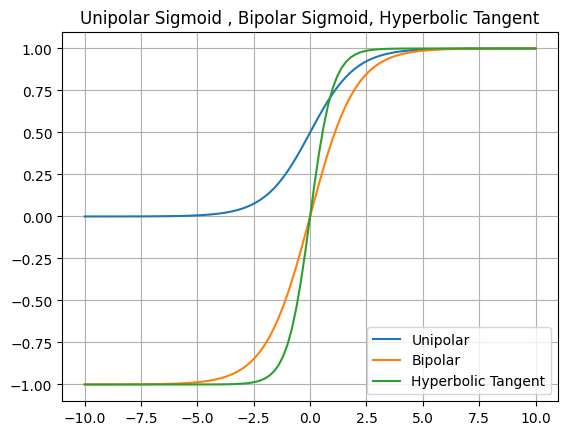

In [15]:
sigmoids = sigmoids()
x = np.linspace(-10, 10, 101)
y_unipolar_sigmoid = []
y_bipolar_sigmoid = [] 
y_tanh = []
for i in range(0, len(x)): 
    y_unipolar_sigmoid.append(sigmoids.unipolar_sigmoid(x[i]))
    y_bipolar_sigmoid.append(sigmoids.bipolar_sigmoid(x[i]))
    y_tanh.append(sigmoids.tanh(x[i]))

plt.plot(x, y_unipolar_sigmoid)
plt.plot(x, y_bipolar_sigmoid)
plt.plot(x, y_tanh)
plt.title('Unipolar Sigmoid , Bipolar Sigmoid, Hyperbolic Tangent')
plt.legend(['Unipolar', 'Bipolar', 'Hyperbolic Tangent'], loc = 'lower right')
plt.grid() 
plt.show()

<p style='text-align: left;'> Plotting sigmoid function(s) with different values of a <p>

In [16]:
x = np.linspace(-10, 10, 11)

y_unipolar_sigmoid = {}
y_bipolar_sigmoid = {}
y_tanh = {}

a = [-5, -1, -.1, -.01, .001, .01, .1, 1, 5]

for i in a: 
    y_unipolar_sigmoid[i] = [] 
    y_bipolar_sigmoid[i] = [] 
    y_tanh[i] = [] 



for j in a:
    for i in x: 
        y_unipolar_sigmoid[j].append(sigmoids.unipolar_sigmoid(i, j)) 

        y_bipolar_sigmoid[j].append(sigmoids.bipolar_sigmoid(i, j))

        y_tanh[j].append(sigmoids.tanh(i, j)) 

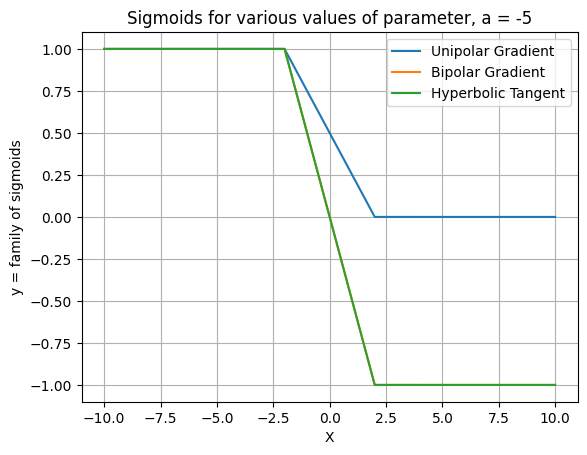

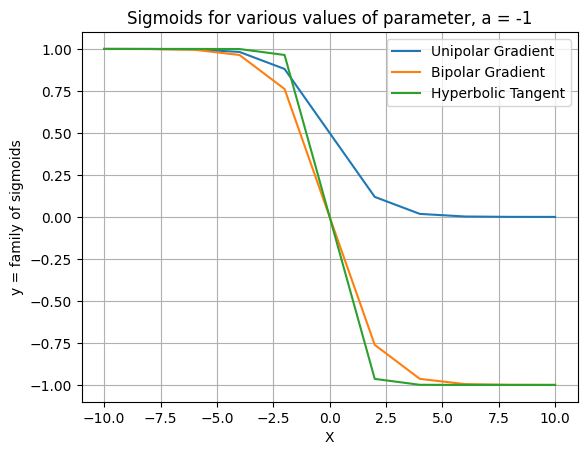

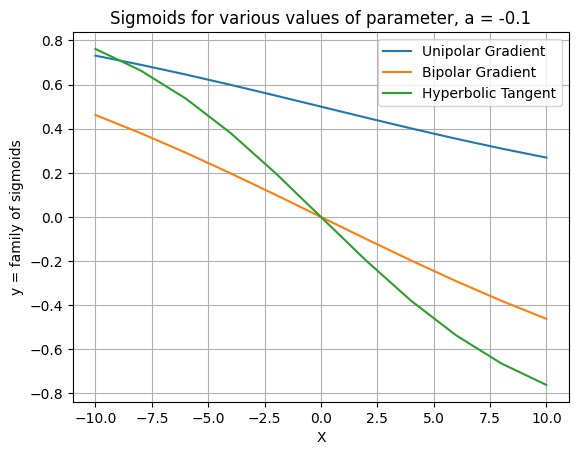

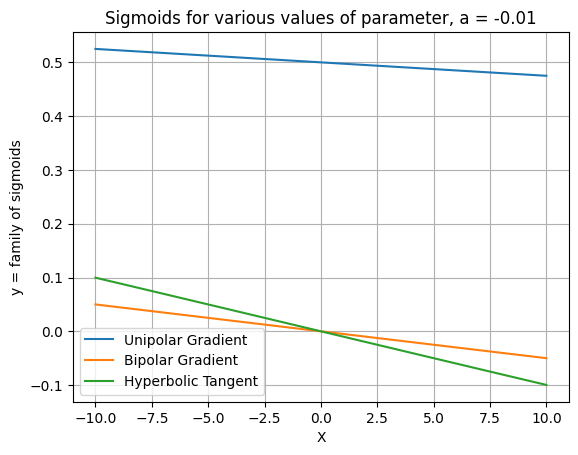

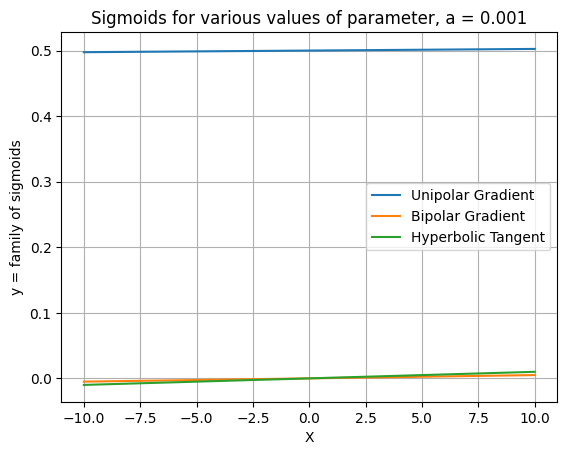

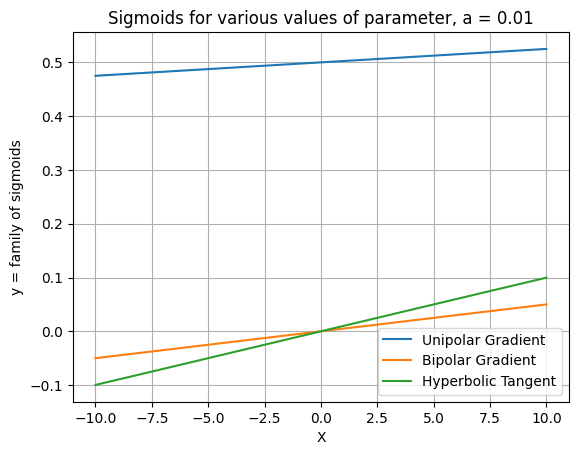

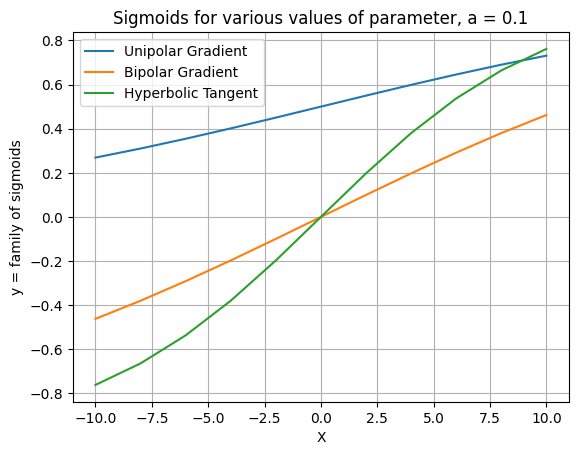

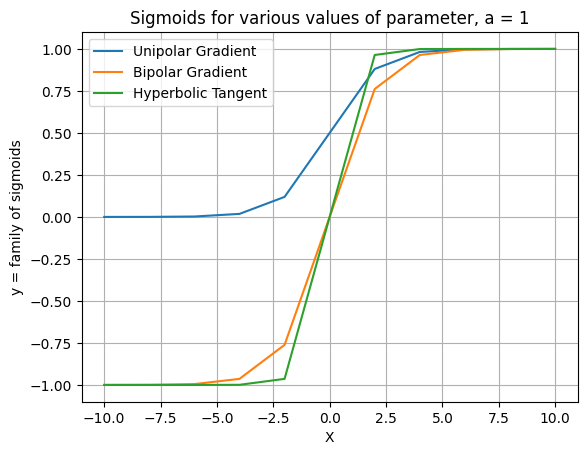

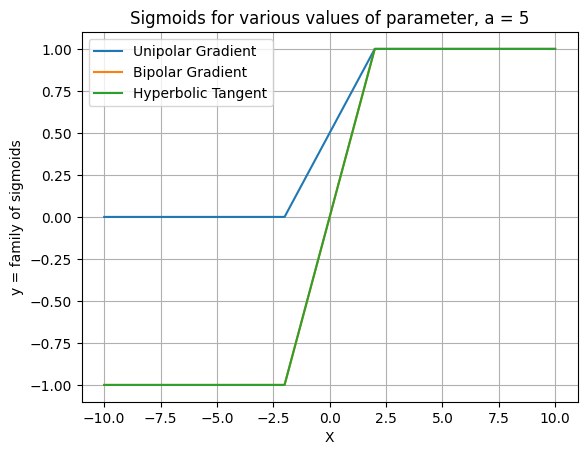

In [17]:
for parameter in a: 
    plt.plot(x, y_unipolar_sigmoid[parameter])
    plt.plot(x, y_bipolar_sigmoid[parameter])
    plt.plot(x, y_tanh[parameter])
    plt.title(f'Sigmoids for various values of parameter, a = {parameter}')
    plt.xlabel('X')
    plt.ylabel('y = family of sigmoids')
    plt.legend(['Unipolar Gradient', 'Bipolar Gradient', 'Hyperbolic Tangent'], loc = 'best')
    plt.grid() 
    plt.show() 

#### Observations 

1. For values of 'a' which are far away from zero, the sigmoids (unipolar, bipolar and hyperbolic tangent) tend be a curve and for 'a' = 0, the sigmoids are staright lines. 
2. In scenarios where the sigmoid is a curve (i.e.) the values of parameter a is far from zero, the larger the value of 'a', the steeper the curve climbs from negative (y) to positive (y)
3. For values of 'a' very closer to zero or zero, the sigmoid functions act as straight line. This can be understood by taking the graident of the sigmoid function for the given particular value of 'a' , Note that, for sigmoid , the derivative is $\sigma (\sigma - 1)$, thus when value of a is very close to zero, the gradient of the curve increases. 
